In [111]:
import pandas as pd
import missingno as mino
import matplotlib.pyplot as plt

In [14]:
data = pd.read_excel('/Users/jung-yeongseo/Downloads/store.xlsx')

In [15]:
data_raw = data.copy() #원본저장

In [17]:
data_raw

,광역시도,시군구,업종대분류,업종중분류,1년미만,1~2년,2~3년,3~5년,5년 이상
0,서울특별시,종로구,관광/여가/오락,연극/영화/극장,1.0,2.0,42.0,39.0,16.0
1,서울특별시,종로구,관광/여가/오락,전시/관람,0.0,6.0,18.0,35.0,44.0
2,서울특별시,종로구,관광/여가/오락,PC/오락/당구/볼링등,0.0,5.0,12.0,86.0,20.0
3,서울특별시,종로구,관광/여가/오락,경마/경륜/성인오락,0.0,1.0,1.0,1.0,2.0
4,서울특별시,종로구,관광/여가/오락,스포츠/운동,0.0,0.0,1.0,0.0,0.0
5,서울특별시,종로구,관광/여가/오락,요가/단전/마사지,0.0,1.0,6.0,18.0,15.0
6,서울특별시,종로구,관광/여가/오락,놀이/여가/취미,0.0,0.0,4.0,6.0,2.0
7,서울특별시,종로구,관광/여가/오락,무도/유흥/가무,1.0,7.0,10.0,75.0,14.0
8,서울특별시,종로구,부동산,부동산중개,33.0,20.0,47.0,60.0,110.0
9,서울특별시,종로구,부동산,평가/개발/관리,2.0,3.0,11.0,3.0,107.0


In [18]:
data = data.melt(data.columns[:4], var_name='년', value_name='수')

In [19]:
data

,광역시도,시군구,업종대분류,업종중분류,년,수
0,서울특별시,종로구,관광/여가/오락,연극/영화/극장,1년미만,1.0
1,서울특별시,종로구,관광/여가/오락,전시/관람,1년미만,0.0
2,서울특별시,종로구,관광/여가/오락,PC/오락/당구/볼링등,1년미만,0.0
3,서울특별시,종로구,관광/여가/오락,경마/경륜/성인오락,1년미만,0.0
4,서울특별시,종로구,관광/여가/오락,스포츠/운동,1년미만,0.0
5,서울특별시,종로구,관광/여가/오락,요가/단전/마사지,1년미만,0.0
6,서울특별시,종로구,관광/여가/오락,놀이/여가/취미,1년미만,0.0
7,서울특별시,종로구,관광/여가/오락,무도/유흥/가무,1년미만,1.0
8,서울특별시,종로구,부동산,부동산중개,1년미만,33.0
9,서울특별시,종로구,부동산,평가/개발/관리,1년미만,2.0


In [20]:
data.info()
#melt할때는 missing data가 항상 생긴다!
#원본에도 미싱데이터잇나 확인해보잦.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103125 entries, 0 to 103124
Data columns (total 6 columns):
광역시도     103125 non-null object
시군구      103125 non-null object
업종대분류    103125 non-null object
업종중분류    103125 non-null object
년        103125 non-null object
수        103085 non-null float64
dtypes: float64(1), object(5)
memory usage: 4.7+ MB


In [21]:
data_raw.info()
#원본에 missing data가 있다!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20625 entries, 0 to 20624
Data columns (total 9 columns):
광역시도     20625 non-null object
시군구      20625 non-null object
업종대분류    20625 non-null object
업종중분류    20625 non-null object
1년미만     20617 non-null float64
1~2년     20617 non-null float64
2~3년     20617 non-null float64
3~5년     20617 non-null float64
5년 이상    20617 non-null float64
dtypes: float64(5), object(4)
memory usage: 1.4+ MB


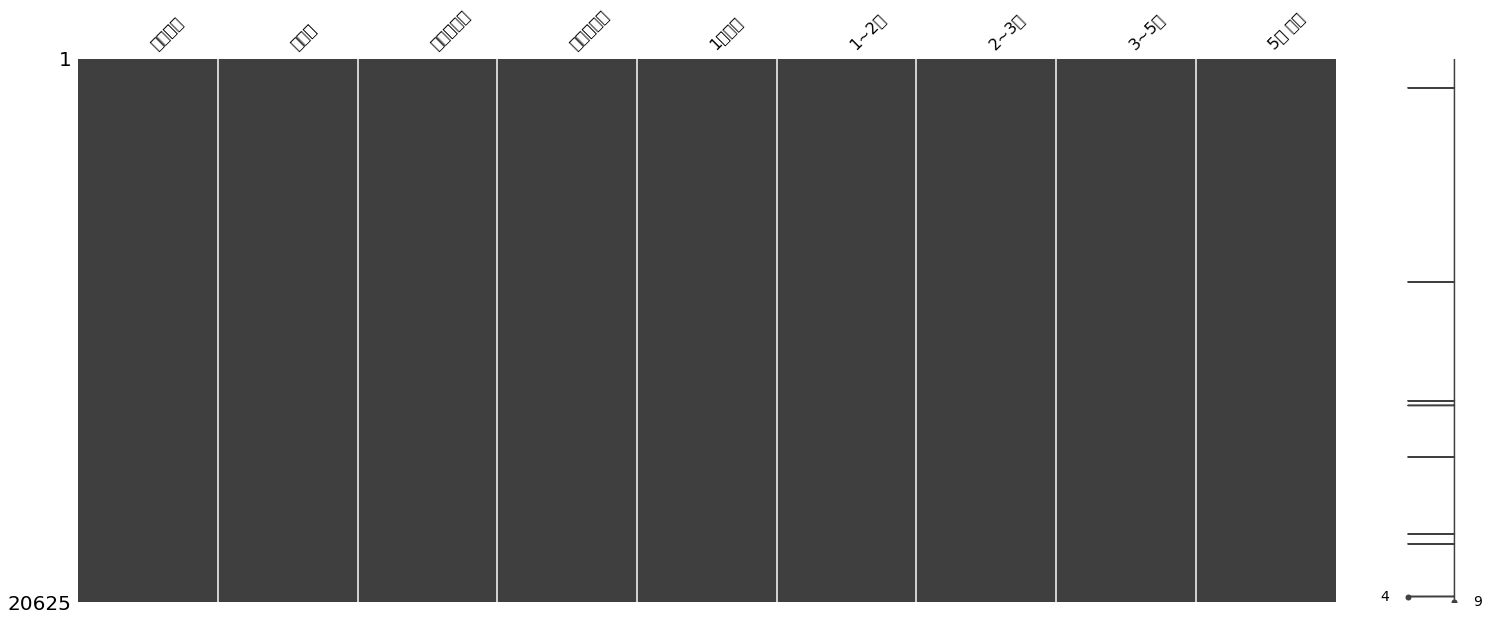

In [28]:
#missing data 확인법
mino.matrix(data_raw)

In [31]:
#missing data 확인법
#all : 모든게 true면 true
data_raw.isna().all()

광역시도     False
시군구      False
업종대분류    False
업종중분류    False
1년미만     False
1~2년     False
2~3년     False
3~5년     False
5년 이상    False
dtype: bool

In [32]:
#any : 하나라도 트루이면 트루
#na 값이 젖ㄱ어도 하나라도 있으면 True 뜸
data_raw.isna().any()

광역시도     False
시군구      False
업종대분류    False
업종중분류    False
1년미만      True
1~2년      True
2~3년      True
3~5년      True
5년 이상     True
dtype: bool

In [33]:
#미싱데이터 화끈ㅇ하게 지워버리자~
data_raw_na = data_raw.dropna()

In [34]:
#지운거 기반으로 다시 멜트하자
data = data_raw_na.melt(data_raw_na.columns[:4], var_name='년', value_name='수')

In [35]:
data.info()
#미싱데이터 사라짐~

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103085 entries, 0 to 103084
Data columns (total 6 columns):
광역시도     103085 non-null object
시군구      103085 non-null object
업종대분류    103085 non-null object
업종중분류    103085 non-null object
년        103085 non-null object
수        103085 non-null float64
dtypes: float64(1), object(5)
memory usage: 4.7+ MB


In [36]:
data

,광역시도,시군구,업종대분류,업종중분류,년,수
0,서울특별시,종로구,관광/여가/오락,연극/영화/극장,1년미만,1.0
1,서울특별시,종로구,관광/여가/오락,전시/관람,1년미만,0.0
2,서울특별시,종로구,관광/여가/오락,PC/오락/당구/볼링등,1년미만,0.0
3,서울특별시,종로구,관광/여가/오락,경마/경륜/성인오락,1년미만,0.0
4,서울특별시,종로구,관광/여가/오락,스포츠/운동,1년미만,0.0
5,서울특별시,종로구,관광/여가/오락,요가/단전/마사지,1년미만,0.0
6,서울특별시,종로구,관광/여가/오락,놀이/여가/취미,1년미만,0.0
7,서울특별시,종로구,관광/여가/오락,무도/유흥/가무,1년미만,1.0
8,서울특별시,종로구,부동산,부동산중개,1년미만,33.0
9,서울특별시,종로구,부동산,평가/개발/관리,1년미만,2.0


In [42]:
#그다음 타입이 이상해~ 바꿪주잦
data['수'] = data['수'].astype('int')

In [43]:
data

,광역시도,시군구,업종대분류,업종중분류,년,수
0,서울특별시,종로구,관광/여가/오락,연극/영화/극장,1년미만,1
1,서울특별시,종로구,관광/여가/오락,전시/관람,1년미만,0
2,서울특별시,종로구,관광/여가/오락,PC/오락/당구/볼링등,1년미만,0
3,서울특별시,종로구,관광/여가/오락,경마/경륜/성인오락,1년미만,0
4,서울특별시,종로구,관광/여가/오락,스포츠/운동,1년미만,0
5,서울특별시,종로구,관광/여가/오락,요가/단전/마사지,1년미만,0
6,서울특별시,종로구,관광/여가/오락,놀이/여가/취미,1년미만,0
7,서울특별시,종로구,관광/여가/오락,무도/유흥/가무,1년미만,1
8,서울특별시,종로구,부동산,부동산중개,1년미만,33
9,서울특별시,종로구,부동산,평가/개발/관리,1년미만,2


In [44]:
#0인값 찾아서 지우자 (있어도되는데 공부하기위해 지워봄)

In [49]:
data = data[data['수'] != 0]

In [50]:
data

,광역시도,시군구,업종대분류,업종중분류,년,수
0,서울특별시,종로구,관광/여가/오락,연극/영화/극장,1년미만,1
7,서울특별시,종로구,관광/여가/오락,무도/유흥/가무,1년미만,1
8,서울특별시,종로구,부동산,부동산중개,1년미만,33
9,서울특별시,종로구,부동산,평가/개발/관리,1년미만,2
11,서울특별시,종로구,부동산,부동산임대,1년미만,1
13,서울특별시,종로구,생활서비스,기타서비스업,1년미만,3
14,서울특별시,종로구,생활서비스,광고/인쇄,1년미만,2
15,서울특별시,종로구,생활서비스,예식/의례/관혼상제,1년미만,3
18,서울특별시,종로구,생활서비스,법무세무회계,1년미만,5
19,서울특별시,종로구,생활서비스,행사/이벤트,1년미만,1


In [53]:
data.groupby('광역시도').count()

,시군구,업종대분류,업종중분류,년,수
광역시도,,,,,
강원도,5691,5691,5691,5691,5691
경기도,12257,12257,12257,12257,12257
경상남도,5605,5605,5605,5605,5605
경상북도,6664,6664,6664,6664,6664
광주광역시,2058,2058,2058,2058,2058
대구광역시,3112,3112,3112,3112,3112
대전광역시,2040,2040,2040,2040,2040
부산광역시,5754,5754,5754,5754,5754
서울특별시,9933,9933,9933,9933,9933


In [58]:
#시 별로 연극,영화,극장이 몇개 있는가
data[data.iloc[:,-3] == '연극/영화/극장'].groupby('광역시도').count()

#즉, 가장많은 동네는 경기도
#이렇게 집계를 내는게 aggregation 분석 이라고 한다!

,시군구,업종대분류,업종중분류,년,수
광역시도,,,,,
강원도,34,34,34,34,34
경기도,109,109,109,109,109
경상남도,41,41,41,41,41
경상북도,40,40,40,40,40
광주광역시,18,18,18,18,18
대구광역시,27,27,27,27,27
대전광역시,17,17,17,17,17
부산광역시,42,42,42,42,42
서울특별시,91,91,91,91,91


In [77]:
data[(data['광역시도'] == '서울특별시') & (data['업종대분류'] == '부동산')].groupby(['시군구','업종중분류']).count()
#aggregation은 인공지능에선 안씀 ㅋㅋ

광역시도  업종대분류  년  수
시군구  업종중분류                      
강남구  부동산관련서비스     3      3  3  3
     부동산임대        5      5  5  5
     부동산중개        5      5  5  5
     분양           5      5  5  5
     평가/개발/관리     5      5  5  5
강동구  부동산관련서비스     4      4  4  4
     부동산임대        5      5  5  5
     부동산중개        5      5  5  5
     분양           3      3  3  3
     평가/개발/관리     3      3  3  3
강북구  부동산관련서비스     1      1  1  1
     부동산임대        4      4  4  4
     부동산중개        5      5  5  5
     분양           3      3  3  3
     평가/개발/관리     4      4  4  4
강서구  부동산관련서비스     3      3  3  3
     부동산임대        4      4  4  4
     부동산중개        5      5  5  5
     분양           5      5  5  5
     평가/개발/관리     5      5  5  5
관악구  부동산관련서비스     3      3  3  3
     부동산임대        3      3  3  3
     부동산중개        5      5  5  5
     분양           3      3  3  3
     평가/개발/관리     5      5  5  5
광진구  부동산관련서비스     3      3  3  3
     부동산임대        4      4  4  4
     부동산중개        5      5  5  5
     분양           3      3  3  3
     평가/개발/관리     3      3  3  3
...             ...    ... .. ..
영등포구 부동산관련서비스     4      4  4  4
     부동산임대        4      4  4  4
     부동산중개        5      5  5  5
     분양           4      4  4  4
     평가/개발/관리     5      5  5  5
용산구  부동산관련서비스     2      2  2  2
     부동산임대        5      5  5  5
     부동산중개        5      5  5  5
     분양           3      3  3  3
     평가/개발/관리     4      4  4  4
은평구  부동산관련서비스     1      1  1  1
     부동산임대        4      4  4  4
     부동산중개        5      5  5  5
     분양           3      3  3  3
     평가/개발/관리     3      3  3  3
종로구  부동산관련서비스     2      2  2  2
     부동산임대        5      5  5  5
     부동산중개        5      5  5  5
     분양           3      3  3  3
     평가/개발/관리     5      5  5  5
중구   부동산관련서비스     3      3  3  3
     부동산임대        5      5  5  5
     부동산중개        5      5  5  5
     분양           3      3  3  3
     평가/개발/관리     5      5  5  5
중랑구  부동산관련서비스     2      2  2  2
     부동산임대        5      5  5  5
     부동산중개        5      5  5  5
     분양           2      2  2  2
     평가/개발/관리     3      3  3  3

[125 rows x 4 columns]

In [81]:
t = data[(data['광역시도'] == '서울특별시') & (data['업종대분류'] == '부동산')].groupby(['시군구','업종중분류'])

In [82]:
dir(t)
#iterable : 순회가능한ㄷ애
#포문에 쓸 수 있다

['__bytes__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_accessors',
 '_add_numeric_operations',
 '_agg_examples_doc',
 '_agg_see_also_doc',
 '_aggregate',
 '_aggregate_generic',
 '_aggregate_item_by_item',
 '_aggregate_multiple_funcs',
 '_apply_filter',
 '_apply_to_column_groupbys',
 '_apply_whitelist',
 '_assure_grouper',
 '_block_agg_axis',
 '_bool_agg',
 '_builtin_table',
 '_choose_path',
 '_concat_objects',
 '_constructor',
 '_cumcount_array',
 '_cython_agg_blocks',
 '_cython_agg_general',
 '_cython_table',
 '_cython_transform',
 '_decide_output_index',
 '_def_str',
 '_define_paths',
 

In [83]:
#콤마가 있다 = 패킹이 되어있다
for i in t:
    print(i)

(('강남구', '부동산관련서비스'),         광역시도  시군구 업종대분류     업종중분류      년    수
43286  서울특별시  강남구   부동산  부동산관련서비스   2~3년    2
63903  서울특별시  강남구   부동산  부동산관련서비스   3~5년    6
84520  서울특별시  강남구   부동산  부동산관련서비스  5년 이상  110)
(('강남구', '부동산임대'),         광역시도  시군구 업종대분류  업종중분류      년    수
2055   서울특별시  강남구   부동산  부동산임대   1년미만    6
22672  서울특별시  강남구   부동산  부동산임대   1~2년    5
43289  서울특별시  강남구   부동산  부동산임대   2~3년   68
63906  서울특별시  강남구   부동산  부동산임대   3~5년   79
84523  서울특별시  강남구   부동산  부동산임대  5년 이상  168)
(('강남구', '부동산중개'),         광역시도  시군구 업종대분류  업종중분류      년    수
2053   서울특별시  강남구   부동산  부동산중개   1년미만   68
22670  서울특별시  강남구   부동산  부동산중개   1~2년   63
43287  서울특별시  강남구   부동산  부동산중개   2~3년  473
63904  서울특별시  강남구   부동산  부동산중개   3~5년  368
84521  서울특별시  강남구   부동산  부동산중개  5년 이상  702)
(('강남구', '분양'),         광역시도  시군구 업종대분류 업종중분류      년    수
2054   서울특별시  강남구   부동산    분양   1년미만    1
22671  서울특별시  강남구   부동산    분양   1~2년    2
43288  서울특별시  강남구   부동산    분양   2~3년  207
63905  서울특별시  강남구   부동산    분양   3~5년   44
84522  서울특별

(('성북구', '부동산임대'),         광역시도  시군구 업종대분류  업종중분류      년   수
41895  서울특별시  성북구   부동산  부동산임대   2~3년  14
62512  서울특별시  성북구   부동산  부동산임대   3~5년  10
83129  서울특별시  성북구   부동산  부동산임대  5년 이상  32)
(('성북구', '부동산중개'),         광역시도  시군구 업종대분류  업종중분류      년    수
665    서울특별시  성북구   부동산  부동산중개   1년미만   29
21282  서울특별시  성북구   부동산  부동산중개   1~2년   19
41899  서울특별시  성북구   부동산  부동산중개   2~3년   30
62516  서울특별시  성북구   부동산  부동산중개   3~5년  182
83133  서울특별시  성북구   부동산  부동산중개  5년 이상  158)
(('성북구', '분양'),         광역시도  시군구 업종대분류 업종중분류      년   수
41898  서울특별시  성북구   부동산    분양   2~3년  22
62515  서울특별시  성북구   부동산    분양   3~5년   1
83132  서울특별시  성북구   부동산    분양  5년 이상   2)
(('성북구', '평가/개발/관리'),         광역시도  시군구 업종대분류     업종중분류      년   수
21279  서울특별시  성북구   부동산  평가/개발/관리   1~2년   2
41896  서울특별시  성북구   부동산  평가/개발/관리   2~3년  10
62513  서울특별시  성북구   부동산  평가/개발/관리   3~5년   4
83130  서울특별시  성북구   부동산  평가/개발/관리  5년 이상  85)
(('송파구', '부동산관련서비스'),         광역시도  시군구 업종대분류     업종중분류      년   수
22764  서울특별시  송파구   부동산  부동산관련서비스   1~

In [84]:
#언패킹을 해보잦
for i,j in t:
    print(i,j)

('강남구', '부동산관련서비스')         광역시도  시군구 업종대분류     업종중분류      년    수
43286  서울특별시  강남구   부동산  부동산관련서비스   2~3년    2
63903  서울특별시  강남구   부동산  부동산관련서비스   3~5년    6
84520  서울특별시  강남구   부동산  부동산관련서비스  5년 이상  110
('강남구', '부동산임대')         광역시도  시군구 업종대분류  업종중분류      년    수
2055   서울특별시  강남구   부동산  부동산임대   1년미만    6
22672  서울특별시  강남구   부동산  부동산임대   1~2년    5
43289  서울특별시  강남구   부동산  부동산임대   2~3년   68
63906  서울특별시  강남구   부동산  부동산임대   3~5년   79
84523  서울특별시  강남구   부동산  부동산임대  5년 이상  168
('강남구', '부동산중개')         광역시도  시군구 업종대분류  업종중분류      년    수
2053   서울특별시  강남구   부동산  부동산중개   1년미만   68
22670  서울특별시  강남구   부동산  부동산중개   1~2년   63
43287  서울특별시  강남구   부동산  부동산중개   2~3년  473
63904  서울특별시  강남구   부동산  부동산중개   3~5년  368
84521  서울특별시  강남구   부동산  부동산중개  5년 이상  702
('강남구', '분양')         광역시도  시군구 업종대분류 업종중분류      년    수
2054   서울특별시  강남구   부동산    분양   1년미만    1
22671  서울특별시  강남구   부동산    분양   1~2년    2
43288  서울특별시  강남구   부동산    분양   2~3년  207
63905  서울특별시  강남구   부동산    분양   3~5년   44
84522  서울특별시  강남구   부동

83133  서울특별시  성북구   부동산  부동산중개  5년 이상  158
('성북구', '분양')         광역시도  시군구 업종대분류 업종중분류      년   수
41898  서울특별시  성북구   부동산    분양   2~3년  22
62515  서울특별시  성북구   부동산    분양   3~5년   1
83132  서울특별시  성북구   부동산    분양  5년 이상   2
('성북구', '평가/개발/관리')         광역시도  시군구 업종대분류     업종중분류      년   수
21279  서울특별시  성북구   부동산  평가/개발/관리   1~2년   2
41896  서울특별시  성북구   부동산  평가/개발/관리   2~3년  10
62513  서울특별시  성북구   부동산  평가/개발/관리   3~5년   4
83130  서울특별시  성북구   부동산  평가/개발/관리  5년 이상  85
('송파구', '부동산관련서비스')         광역시도  시군구 업종대분류     업종중분류      년   수
22764  서울특별시  송파구   부동산  부동산관련서비스   1~2년   1
63998  서울특별시  송파구   부동산  부동산관련서비스   3~5년   2
84615  서울특별시  송파구   부동산  부동산관련서비스  5년 이상  91
('송파구', '부동산임대')         광역시도  시군구 업종대분류  업종중분류      년   수
2149   서울특별시  송파구   부동산  부동산임대   1년미만   2
22766  서울특별시  송파구   부동산  부동산임대   1~2년   1
43383  서울특별시  송파구   부동산  부동산임대   2~3년   5
64000  서울특별시  송파구   부동산  부동산임대   3~5년  13
84617  서울특별시  송파구   부동산  부동산임대  5년 이상  41
('송파구', '부동산중개')         광역시도  시군구 업종대분류  업종중분류      년    수
2146 

In [87]:
from collections import Counter

In [88]:
Counter('aaabbcccc')
#반복되는것 중에 몇개 있는지 알아내는 애 

Counter({'a': 3, 'b': 2, 'c': 4})

In [90]:
data['업종대분류'].value_counts()
#count랑 비슷하다! 
#그럼 count를 써도 될까?

소매          23597
생활서비스       15738
음식          14909
학문/교육       10891
관광/여가/오락     5323
부동산          3331
숙박           3095
스포츠          2230
Name: 업종대분류, dtype: int64

In [92]:
Counter(data['업종대분류'])
#된다! 꽤많이쓰는애임

Counter({'관광/여가/오락': 5323,
         '부동산': 3331,
         '생활서비스': 15738,
         '소매': 23597,
         '숙박': 3095,
         '스포츠': 2230,
         '음식': 14909,
         '학문/교육': 10891})

In [93]:
x = Counter(data['업종대분류'])

In [101]:
s = x.most_common()
#리스트형태

In [102]:
s

[('소매', 23597),
 ('생활서비스', 15738),
 ('음식', 14909),
 ('학문/교육', 10891),
 ('관광/여가/오락', 5323),
 ('부동산', 3331),
 ('숙박', 3095),
 ('스포츠', 2230)]

In [105]:
s.sort()

In [106]:
s

[('관광/여가/오락', 5323),
 ('부동산', 3331),
 ('생활서비스', 15738),
 ('소매', 23597),
 ('숙박', 3095),
 ('스포츠', 2230),
 ('음식', 14909),
 ('학문/교육', 10891)]

In [99]:
s.sort(key=lambda t:t[1])
#리스트형태이면 값으로도 정렬할 수 있다. 

In [100]:
s

[('스포츠', 2230),
 ('숙박', 3095),
 ('부동산', 3331),
 ('관광/여가/오락', 5323),
 ('학문/교육', 10891),
 ('음식', 14909),
 ('생활서비스', 15738),
 ('소매', 23597)]

In [107]:
#value count는 normalize를 하면 전체 비율을 볼 수 있음
#하지만 자유자재로 바꾸지는 못함
#counter는 자유자재로 바꾸기 가능

In [117]:
sa = data['업종대분류']

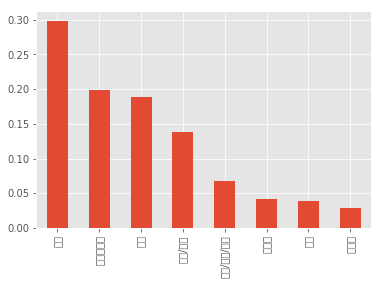

In [118]:
sa.value_counts(True).plot.bar()
#원래  파란색으로 안이쁘게나와 ㅜㅜ

In [112]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [113]:
plt.style.use('ggplot')
#plot 스타일 변화주기

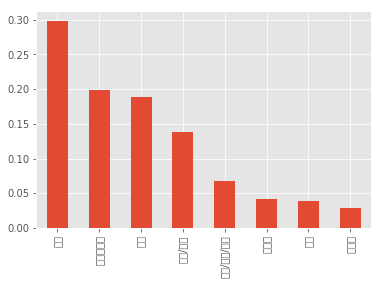

In [116]:
sa.value_counts(True).plot.bar()

In [119]:
import numpy as np

In [120]:
t.agg(['count','sum']) 
#count,sum 두 개 동시에 된다

광역시도                            업종대분류                      년  \
              count                        sum count              sum count   
시군구  업종중분류                                                                    
강남구  부동산관련서비스     3            서울특별시서울특별시서울특별시     3        부동산부동산부동산     3   
     부동산임대        5  서울특별시서울특별시서울특별시서울특별시서울특별시     5  부동산부동산부동산부동산부동산     5   
     부동산중개        5  서울특별시서울특별시서울특별시서울특별시서울특별시     5  부동산부동산부동산부동산부동산     5   
     분양           5  서울특별시서울특별시서울특별시서울특별시서울특별시     5  부동산부동산부동산부동산부동산     5   
     평가/개발/관리     5  서울특별시서울특별시서울특별시서울특별시서울특별시     5  부동산부동산부동산부동산부동산     5   
강동구  부동산관련서비스     4       서울특별시서울특별시서울특별시서울특별시     4     부동산부동산부동산부동산     4   
     부동산임대        5  서울특별시서울특별시서울특별시서울특별시서울특별시     5  부동산부동산부동산부동산부동산     5   
     부동산중개        5  서울특별시서울특별시서울특별시서울특별시서울특별시     5  부동산부동산부동산부동산부동산     5   
     분양           3            서울특별시서울특별시서울특별시     3        부동산부동산부동산     3   
     평가/개발/관리     3            서울특별시서울특별시서울특별시     3        부동산부동산부동산     3   
강북구  부동산관련서비스     1                      서울특별시     1              부동산     1   
     부동산임대        4       서울특별시서울특별시서울특별시서울특별시     4     부동산부동산부동산부동산     4   
     부동산중개        5  서울특별시서울특별시서울특별시서울특별시서울특별시     5  부동산부동산부동산부동산부동산     5   
     분양           3            서울특별시서울특별시서울특별시     3        부동산부동산부동산     3   
     평가/개발/관리     4       서울특별시서울특별시서울특별시서울특별시     4     부동산부동산부동산부동산     4   
강서구  부동산관련서비스     3            서울특별시서울특별시서울특별시     3        부동산부동산부동산     3   
     부동산임대        4       서울특별시서울특별시서울특별시서울특별시     4     부동산부동산부동산부동산     4   
     부동산중개        5  서울특별시서울특별시서울특별시서울특별시서울특별시     5  부동산부동산부동산부동산부동산     5   
     분양           5  서울특별시서울특별시서울특별시서울특별시서울특별시     5  부동산부동산부동산부동산부동산     5   
     평가/개발/관리     5  서울특별시서울특별시서울특별시서울특별시서울특별시     5  부동산부동산부동산부동산부동산     5   
관악구  부동산관련서비스     3            서울특별시서울특별시서울특별시     3        부동산부동산부동산     3   
     부동산임대        3            서울특별시서울특별시서울특별시     3        부동산부동산부동산     3   
     부동산중개        5  서울특별시서울특별시서울특별시서울특별시서울특별시     5  부동산부동산부동산부동산부동산     5   
     분양           3            서울특별시서울특별시서울특별시     3        부동산부동산부동산     3   
     평가/개발/관리     5  서울특별시서울특별시서울특별시서울특별시서울특별시     5  부동산부동산부동산부동산부동산     5   
광진구  부동산관련서비스     3            서울특별시서울특별시서울특별시     3        부동산부동산부동산     3   
     부동산임대        4       서울특별시서울특별시서울특별시서울특별시     4     부동산부동산부동산부동산     4   
     부동산중개        5  서울특별시서울특별시서울특별시서울특별시서울특별시     5  부동산부동산부동산부동산부동산     5   
     분양           3            서울특별시서울특별시서울특별시     3        부동산부동산부동산     3   
     평가/개발/관리     3            서울특별시서울특별시서울특별시     3        부동산부동산부동산     3   
...             ...                        ...   ...              ...   ...   
영등포구 부동산관련서비스     4       서울특별시서울특별시서울특별시서울특별시     4     부동산부동산부동산부동산     4   
     부동산임대        4       서울특별시서울특별시서울특별시서울특별시     4     부동산부동산부동산부동산     4   
     부동산중개        5  서울특별시서울특별시서울특별시서울특별시서울특별시     5  부동산부동산부동산부동산부동산     5   
     분양           4       서울특별시서울특별시서울특별시서울특별시     4     부동산부동산부동산부동산     4   
     평가/개발/관리     5  서울특별시서울특별시서울특별시서울특별시서울특별시     5  부동산부동산부동산부동산부동산     5   
용산구  부동산관련서비스     2                 서울특별시서울특별시     2           부동산부동산     2   
     부동산임대        5  서울특별시서울특별시서울특별시서울특별시서울특별시     5  부동산부동산부동산부동산부동산     5   
     부동산중개        5  서울특별시서울특별시서울특별시서울특별시서울특별시     5  부동산부동산부동산부동산부동산     5   
     분양           3            서울특별시서울특별시서울특별시     3        부동산부동산부동산     3   
     평가/개발/관리     4       서울특별시서울특별시서울특별시서울특별시     4     부동산부동산부동산부동산     4   
은평구  부동산관련서비스     1                      서울특별시     1              부동산     1   
     부동산임대        4       서울특별시서울특별시서울특별시서울특별시     4     부동산부동산부동산부동산     4   
     부동산중개        5  서울특별시서울특별시서울특별시서울특별시서울특별시     5  부동산부동산부동산부동산부동산     5   
     분양           3            서울특별시서울특별시서울특별시     3        부동산부동산부동산     3   
     평가/개발/관리     3            서울특별시서울특별시서울특별시     3        부동산부동산부동산     3   
종로구  부동산관련서비스     2                 서울특별시서울특별시     2           부동산부동산     2   
     부동산임대        5  서울특별시서울특별시서울특별시서울특별시서울특별시     5  부동산부동산부동산부동

In [121]:
t.agg(['count', np.std])

수            
              count         std
시군구  업종중분류                     
강남구  부동산관련서비스     3   61.231800
     부동산임대        5   66.885723
     부동산중개        5  273.904545
     분양           5   85.963364
     평가/개발/관리     5  282.709745
강동구  부동산관련서비스     4   34.500000
     부동산임대        5    7.231874
     부동산중개        5  117.355017
     분양           3    2.081666
     평가/개발/관리     3   16.772994
강북구  부동산관련서비스     1         NaN
     부동산임대        4    3.403430
     부동산중개        5   24.263141
     분양           3    3.785939
     평가/개발/관리     4   19.551215
강서구  부동산관련서비스     3   80.541915
     부동산임대        4   16.268579
     부동산중개        5  100.231233
     분양           5    5.727128
     평가/개발/관리     5   50.147782
관악구  부동산관련서비스     3   35.510562
     부동산임대        3   14.364308
     부동산중개        5   84.662270
     분양           3    3.785939
     평가/개발/관리     5   13.535139
광진구  부동산관련서비스     3   30.022214
     부동산임대        4   14.651507
     부동산중개        5  128.002734
     분양           3   19.078784
     평가/개발/관리     3   50.229473
...             ...         ...
영등포구 부동산관련서비스     4   41.352146
     부동산임대        4   33.380383
     부동산중개        5   82.721219
     분양           4   18.625699
     평가/개발/관리     5   48.354938
용산구  부동산관련서비스     2   39.597980
     부동산임대        5   20.255863
     부동산중개        5   62.086230
     분양           3   10.785793
     평가/개발/관리     4   24.041631
은평구  부동산관련서비스     1         NaN
     부동산임대        4   11.445523
     부동산중개        5   51.143915
     분양           3    1.527525
     평가/개발/관리     3   20.550750
종로구  부동산관련서비스     2   15.556349
     부동산임대        5   13.754999
     부동산중개        5   34.705907
     분양           3   11.930353
     평가/개발/관리     5   45.871560
중구   부동산관련서비스     3    9.814955
     부동산임대        5   23.091124
     부동산중개        5   60.332413
     분양           3    5.859465
     평가/개발/관리     5   53.176122
중랑구  부동산관련서비스     2   48.083261
     부동산임대        5   10.158740
     부동산중개        5   45.754781
     분양           2    2.121320
     평가/개발/관리     3   33.201406

[125 rows x 2 columns]

In [123]:
t.transform('count')
#groupby 했던 걸 각각의 값으로 바꿔주는게 transform

,광역시도,업종대분류,년,수
8,5,5,5,5
9,5,5,5,5
11,5,5,5,5
103,5,5,5,5
105,5,5,5,5
106,5,5,5,5
198,5,5,5,5
200,4,4,4,4
201,5,5,5,5
290,5,5,5,5


In [127]:
t = data[(data['광역시도'] == '서울특별시') | (data['광역시도']=='강원도') & (data['업종대분류'] == '부동산')].groupby(['시군구','업종중분류'])

In [128]:
#위에꺼 너무 기니까 이걸로쓰자.
#조건이 여러개일 때 isin 쓴다! 

data['광역시도'].isin(['서울특별시', '강원도'])

0          True
7          True
8          True
9          True
11         True
13         True
14         True
15         True
18         True
19         True
21         True
22         True
24         True
26         True
28         True
29         True
30         True
31         True
32         True
33         True
35         True
37         True
38         True
39         True
40         True
41         True
42         True
43         True
45         True
46         True
          ...  
103054    False
103055    False
103056    False
103057    False
103058    False
103059    False
103060    False
103061    False
103062    False
103063    False
103064    False
103065    False
103066    False
103067    False
103068    False
103069    False
103070    False
103071    False
103072    False
103073    False
103074    False
103075    False
103076    False
103078    False
103079    False
103080    False
103081    False
103082    False
103083    False
103084    False
Name: 광역시도, Length: 7911

In [129]:
t.count()

광역시도  업종대분류  년  수
시군구 업종중분류                          
강남구 PC/오락/당구/볼링등     5      5  5  5
    가구소매             5      5  5  5
    가방/신발/액세서리       5      5  5  5
    가전제품소매           5      5  5  5
    가정/주방/인테리어       5      5  5  5
    개인/가정용품수리        5      5  5  5
    개인서비스            5      5  5  5
    건강/미용식품          5      5  5  5
    경마/경륜/성인오락       5      5  5  5
    광고/인쇄            5      5  5  5
    기타교육기관           4      4  4  4
    기타서비스업           5      5  5  5
    기타음식업            5      5  5  5
    기타판매업            5      5  5  5
    놀이/여가/취미         4      4  4  4
    닭/오리요리           5      5  5  5
    대중목욕탕/휴게         5      5  5  5
    대행업              4      4  4  4
    도서관/독서실          4      4  4  4
    모텔/여관/여인숙        5      5  5  5
    무도/유흥/가무         5      5  5  5
    물품기기대여           5      5  5  5
    민박/하숙            4      4  4  4
    법무세무회계           5      5  5  5
    별식/퓨전요리          5      5  5  5
    부동산관련서비스         3      3  3  3
    부동산임대            5      5  5  5
    부동산중개            5      5  5  5
    부페               5      5  5  5
    분식               5      5  5  5
...                ...    ... .. ..
철원군 평가/개발/관리         1      1  1  1
춘천시 부동산관련서비스         3      3  3  3
    부동산임대            4      4  4  4
    부동산중개            5      5  5  5
    분양               3      3  3  3
    평가/개발/관리         4      4  4  4
태백시 부동산관련서비스         2      2  2  2
    부동산임대            4      4  4  4
    부동산중개            2      2  2  2
    분양               2      2  2  2
    평가/개발/관리         3      3  3  3
평창군 부동산관련서비스         1      1  1  1
    부동산임대            3      3  3  3
    부동산중개            4      4  4  4
    분양               3      3  3  3
    평가/개발/관리         1      1  1  1
홍천군 부동산관련서비스         1      1  1  1
    부동산임대            3      3  3  3
    부동산중개            4      4  4  4
    분양               1      1  1  1
    평가/개발/관리         3      3  3  3
화천군 부동산관련서비스         1      1  1  1
    부동산임대            2      2  2  2
    부동산중개            3      3  3  3
    분양               1      1  1  1
횡성군 부동산관련서비스         1      1  1  1
    부동산임대            4      4  4  4
    부동산중개            5      5  5  5
    분양               2      2  2  2
    평가/개발/관리         2      2  2  2

[2411 rows x 4 columns]

In [132]:
#where로도 쓸수있따 (조건만ㄷ르때 ㄷ씀)
data.where(data['광역시도'].isin(['서울특별시','강원도']))

,광역시도,시군구,업종대분류,업종중분류,년,수
0,서울특별시,종로구,관광/여가/오락,연극/영화/극장,1년미만,1.0
7,서울특별시,종로구,관광/여가/오락,무도/유흥/가무,1년미만,1.0
8,서울특별시,종로구,부동산,부동산중개,1년미만,33.0
9,서울특별시,종로구,부동산,평가/개발/관리,1년미만,2.0
11,서울특별시,종로구,부동산,부동산임대,1년미만,1.0
13,서울특별시,종로구,생활서비스,기타서비스업,1년미만,3.0
14,서울특별시,종로구,생활서비스,광고/인쇄,1년미만,2.0
15,서울특별시,종로구,생활서비스,예식/의례/관혼상제,1년미만,3.0
18,서울특별시,종로구,생활서비스,법무세무회계,1년미만,5.0
19,서울특별시,종로구,생활서비스,행사/이벤트,1년미만,1.0


In [133]:
data.notna()
#isna에 반대되는 애들

,광역시도,시군구,업종대분류,업종중분류,년,수
0,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,True,True,True,True,True,True
11,True,True,True,True,True,True
13,True,True,True,True,True,True
14,True,True,True,True,True,True
15,True,True,True,True,True,True
18,True,True,True,True,True,True
19,True,True,True,True,True,True


In [134]:
#groupby 삼총사..

In [151]:
pd.crosstab(data['년'],data['광역시도'],aggfunc='count')
#왜 에러낮지 . .?


ValueError: aggfunc cannot be used without values.

In [142]:
data.groupby(['년','광역시도']).count().unstack()
#index, column 바꿀 수 있음 

시군구                                                          ...  \
광역시도    강원도   경기도  경상남도  경상북도 광주광역시 대구광역시 대전광역시 부산광역시 서울특별시 세종특별자치시  ...   
년                                                                    ...   
1~2년    779  2041   821   876   363   509   330   873  1718      68  ...   
1년미만   1023  2229   898  1136   383   574   365  1021  1728      73  ...   
2~3년   1082  2502  1049  1260   418   632   437  1128  2090      89  ...   
3~5년   1284  2687  1307  1539   439   686   451  1326  2158      86  ...   
5년 이상  1523  2798  1530  1853   455   711   457  1406  2239      85  ...   

          수                                                           
광역시도  부산광역시 서울특별시 세종특별자치시 울산광역시 인천광역시  전라남도  전라북도 제주특별자치도  충청남도 충청북도  
년                                                                     
1~2년    873  1718      68   268   553   847   607     131   684  527  
1년미만   1021  1728      73   320   606  1141   800     152   887  615  
2~3년   1128  2090      89   362   753  1236   805     165   943  670  
3~5년   1326  2158      86   405   827  1466  1019     174  1148  800  
5년 이상  1406  2239      85   443   847  1810  1166     184  1307  931  

[5 rows x 68 columns]

In [150]:
data.pivot_table('수','년',aggfunc='count', margins=True)

,수
년,
1~2년,11995
1년미만,13951
2~3년,15621
3~5년,17802
5년 이상,19745
All,79114


In [152]:
!pip install pdvega

    100% |████████████████████████████████| 61kB 58kB/s ta 0:00:0101
    100% |████████████████████████████████| 1.5MB 33kB/s ta 0:00:01
  Stored in directory: /Users/jung-yeongseo/Library/Caches/pip/wheels/64/67/6c/3faafbf516d2bdfab7b3efc6e5db7dcf8dce060ea9da8fbe62
  Stored in directory: /Users/jung-yeongseo/Library/Caches/pip/wheels/bb/d1/fa/c1f13e071650f6dd9c6b986b7ee4d19dbfc7bc32a902593d39
Successfully built pdvega vega3


In [154]:
import pdvega

In [155]:
b = pd.crosstab(data['년'], data['광역시도'],data['수'], aggfunc= 'count')

In [ ]:
#pdvega그리는법 ?